# Problem: Money transfer disputes

Build model to stop more SPEI transfer disputes.

In [1]:
import pandas as pd

disputes = pd.read_csv("disputes.csv")
disputes

,sumatra_id,reason
0,96ea1b1b-9a37-4a77-8a57-0b12a91fee7d,ato_drain
1,7ea73a30-79d2-4212-b51f-16bb53f26031,ato_drain
2,3259a25a-4e50-4547-887b-fcc03e949046,social_scam
3,56c032b1-6dd9-4591-b219-cf85bff71940,social_scam
4,b82dcc25-da88-46c3-9d96-c3a6fd307112,social_scam
...,...,...
385,8a879ffe-7297-4fbc-b6e2-c8bb215c6ac5,social_scam
386,799c3e51-571f-42ea-8c79-eded9153089b,social_scam
387,d173a67f-f434-474c-98a5-4b48cb9d45db,social_scam
388,d88396df-725a-4a91-8341-d1ad97cc5ffe,social_scam


# Approach: Add ATO Features to Transfer Model

Start by fetching historical data for Train and Test

In [2]:
from sumatra import Client
sumatra = Client('console.qa.sumatra.ai')

## Enrich historical events with candidate features

Replay events through Sumatra topology to compute historical feature values.

In [3]:
enriched = sumatra.materialize(timeline="sim_100k_180d", branch="dev_kuhlmann")
spei_outgoing = enriched.get_events("spei_outgoing")
spei_outgoing

,_type,_time,acct_creation_date,acct_id,amount,beneficiary_bank,beneficiary_clabe,beneficiary_full_name,clabe,currency,...,full_name,ip,max_failed_logins,money_out_48h,name_similarity,order_id,past_pair_money_transferred,prior_balance,trusted_device_token,unique_senders_to_beneficiary
_id,,,,,,,,,,,,,,,,,,,,,
3705ea18-dfa4-4432-b9df-71cbea81537d,spei_outgoing,2021-01-01 00:34:29.027000-06:00,2019-07-11 19:19:34,4f1dd40e9bd9,152.29,HSBC Mexico,021071109934366651,Michelle Pearson,134011322972040254,MXN,...,Michelle Pearson,48.92.153.246,0.0,152.29,1.000000,oid-81e5f809aa,0.0,1424.15,tk_f491634c24be,1
972f4158-a7ce-4dd9-b19c-97ac4e466023,spei_outgoing,2021-01-01 00:37:35.227000-06:00,2019-08-24 17:20:32,21cbb2041dce,287.14,Sistema de Transferencias y Pagos,134821350805681217,Natasha Gordon,134821332859337168,MXN,...,Rachel Green,108.234.109.197,0.0,287.14,0.461538,oid-9583e0da17,0.0,1399.22,tk_1cdacf07728b,1
a2336cbc-b979-4a17-b503-6afa3ad9ebfa,spei_outgoing,2021-01-01 00:48:27.832000-06:00,2019-02-22 20:09:21,d2e8b13c1e0f,1782.70,Banorte,072913893543592886,Janet Camacho,134821790025944871,MXN,...,Janet Camacho,1.193.186.83,0.0,1782.70,1.000000,oid-482f760a21,0.0,1782.70,tk_591230b5e0d7,1
cce89c03-bcc4-4519-8f06-daf256c7e881,spei_outgoing,2021-01-01 00:51:03.031000-06:00,2019-08-08 03:42:33,92c2705cd0fe,2520.51,Citibanamex,002100472795997871,Grant Mills,134092460538111451,MXN,...,Grant Mills,89.101.11.255,0.0,2520.51,1.000000,oid-b16530f03f,0.0,2520.51,tk_ac498ab95b83,1
06af05b2-b16c-4878-91a5-0a924abf0765,spei_outgoing,2021-01-01 00:58:18.789000-06:00,2019-05-17 16:23:54,c0ed1483f7aa,1112.18,Citibanamex,002101633541069393,Alexander Castaneda,134011318020379049,MXN,...,Alexander Castaneda,165.11.18.51,0.0,1112.18,1.000000,oid-4c040b12d8,0.0,1112.18,tk_cf821d9f004b,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85a76fe0-5362-4566-8e68-eb0c4ae8cb8e,spei_outgoing,2021-06-29 19:37:37.792000-05:00,2020-05-01 08:46:11,e45c69cc7ffe,306.06,Sistema de Transferencias y Pagos,134011562558645395,James Nguyen,134821205993054137,MXN,...,Robert Patel,185.183.31.69,1.0,306.06,0.250000,oid-e6795ecbc2,0.0,370.39,tk_6acc31d3f566,1
a3e37157-7dfa-44d6-a419-608466541974,spei_outgoing,2021-06-29 20:10:02.971000-05:00,2019-05-30 01:02:02,82d2d3437bdd,1449.39,BBVA Bancomer,012009138772692262,Robert Hernandez,134011426244425503,MXN,...,Scott Werner,118.84.149.220,1.0,1449.39,0.500000,oid-29971bc2fb,0.0,2004.00,tk_770e252d5fd7,5
b2168a63-867f-41a5-bb65-b9ad4e3bd5ed,spei_outgoing,2021-06-29 20:27:34.018000-05:00,2019-06-06 17:34:19,062f3c6bbe97,573.55,Sistema de Transferencias y Pagos,134821494649970920,Christina Price,134092141163997624,MXN,...,Allison Diaz,95.241.15.1,1.0,719.88,0.370370,oid-b26edc428a,0.0,595.33,tk_c669b5f02f3b,2


## Join feature data and labels

In [4]:
labeled = pd.merge(spei_outgoing, disputes, 'left', left_on='_id', right_on='sumatra_id')
labeled['is_fraud'] = ~labeled.sumatra_id.isna()
labeled.is_fraud.value_counts()

False    7588
True      390
Name: is_fraud, dtype: int64

## Choose subset of features

In [5]:
original = [
    'amount',
    'name_similarity',
    'money_out_48h',
    'past_pair_money_transferred',
    'unique_senders_to_beneficiary',
    'max_failed_logins',
]
new = [
    'days_since_device_update',
]
features = original + new
labeled[features + ['is_fraud']]

,amount,name_similarity,money_out_48h,past_pair_money_transferred,unique_senders_to_beneficiary,max_failed_logins,days_since_device_update,is_fraud
0,152.29,1.000000,152.29,0.0,1,0.0,NaN,False
1,287.14,0.461538,287.14,0.0,1,0.0,NaN,False
2,1782.70,1.000000,1782.70,0.0,1,0.0,NaN,False
3,2520.51,1.000000,2520.51,0.0,1,0.0,NaN,False
4,1112.18,1.000000,1112.18,0.0,1,0.0,NaN,False
...,...,...,...,...,...,...,...,...
7973,306.06,0.250000,306.06,0.0,1,1.0,NaN,False
7974,1449.39,0.500000,1449.39,0.0,5,1.0,NaN,False
7975,573.55,0.370370,719.88,0.0,2,1.0,NaN,False
7976,366.58,0.285714,366.58,0.0,1,0.0,NaN,False


## Use standard missing-value replacement

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed = pd.DataFrame(imp.fit_transform(labeled[features+['is_fraud']]), columns=features+['is_fraud'])
imputed

,amount,name_similarity,money_out_48h,past_pair_money_transferred,unique_senders_to_beneficiary,max_failed_logins,days_since_device_update,is_fraud
0,152.29,1.000000,152.29,0.0,1.0,0.0,9.936715,0.0
1,287.14,0.461538,287.14,0.0,1.0,0.0,9.936715,0.0
2,1782.70,1.000000,1782.70,0.0,1.0,0.0,9.936715,0.0
3,2520.51,1.000000,2520.51,0.0,1.0,0.0,9.936715,0.0
4,1112.18,1.000000,1112.18,0.0,1.0,0.0,9.936715,0.0
...,...,...,...,...,...,...,...,...
7973,306.06,0.250000,306.06,0.0,1.0,1.0,9.936715,0.0
7974,1449.39,0.500000,1449.39,0.0,5.0,1.0,9.936715,0.0
7975,573.55,0.370370,719.88,0.0,2.0,1.0,9.936715,0.0
7976,366.58,0.285714,366.58,0.0,1.0,0.0,9.936715,0.0


## Time-based Train/Test split

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(imputed, shuffle=False, test_size=0.2)
print("Train set size:", train.shape)
print("Test set size: ", test.shape)

Train set size: (6382, 8)
Test set size:  (1596, 8)


## Train ML models and measure performance

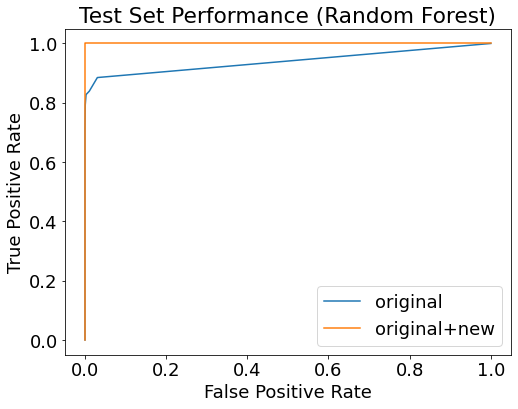

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 18
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test Set Performance (Random Forest)")

# original
clf = RandomForestClassifier(n_estimators=5)
clf.fit(train[original], train.is_fraud)

test_score = clf.predict_proba(test[original])[:,1]
fpr, tpr, thresholds = roc_curve(test.is_fraud, test_score)

plt.plot(fpr, tpr, label='original')

# original + new
if new:
    clf = RandomForestClassifier(n_estimators=10)
    clf.fit(train[original + new], train.is_fraud)

    test_score = clf.predict_proba(test[original + new])[:,1]
    fpr, tpr, thresholds = roc_curve(test.is_fraud, test_score)

    plt.plot(fpr, tpr, label='original+new')
    plt.legend(loc='best')